<a href="https://www.kaggle.com/code/raxmatillo/aviakompaniya?scriptVersionId=218901059" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


# Datasetlarni tayyorlab olamiz

In [2]:
train = pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv', index_col=0)
test = pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
sample = pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')

In [3]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [5]:
train['Arrival Delay in Minutes'].value_counts()

Arrival Delay in Minutes
0.0      5729
1.0       207
2.0       197
3.0       188
4.0       178
         ... 
314.0       1
128.0       1
267.0       1
145.0       1
210.0       1
Name: count, Length: 242, dtype: int64

In [6]:
train.shape

(10000, 23)

In [7]:
train.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


train['Gender'] = labelencoder.fit_transform(train['Gender'].values)
train['Customer Type'] = labelencoder.fit_transform(train['Customer Type'].values)
train['Type of Travel'] = labelencoder.fit_transform(train['Type of Travel'].values)
train['Class'] = labelencoder.fit_transform(train['Class'].values)

In [9]:
train.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [10]:
train = train.fillna(0)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [12]:
train['satisfaction'].value_counts()

satisfaction
0    5000
1    5000
Name: count, dtype: int64

# Machine Learningga tayyorlash

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# ML algoritmlarini tayyorlab olamiz

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# LogisticRegression
lr_model = LogisticRegression(penalty='l2', solver='liblinear')
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_valid)

# DecisionTreeClassifier (DecistionTreeRegression to'g'irlandi)
tr_model = DecisionTreeClassifier()
tr_model.fit(X_train, y_train)
tr_y_pred = tr_model.predict(X_valid)

# RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_valid)

# Support Vector Machine (uzoq vaqt talab qilgani uchun sinab ko'rolmadim)
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)
# svm_y_pred = svm_model.predict(X_valid)

# Baholash

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Umumiy holda baholovchi funksiyamizni yozib olamiz
def score(y_true, y_pred, model_name):
    acc = accuracy_score(y_valid, y_pred)
    auc_score = roc_auc_score(y_valid, y_pred)
    print(model_name)
    print(f"-- AUC: {auc_score:.2f}")
    print(f"-- Accuracy: {acc:.2f}")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
    plt.show()

LogisticRegression
-- AUC: 0.88
-- Accuracy: 0.88


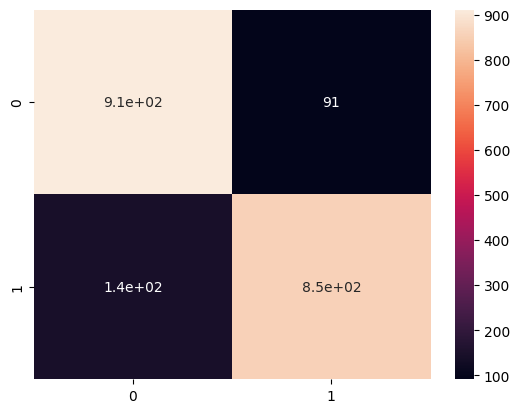

DecisionTreeClassifier
-- AUC: 0.93
-- Accuracy: 0.94


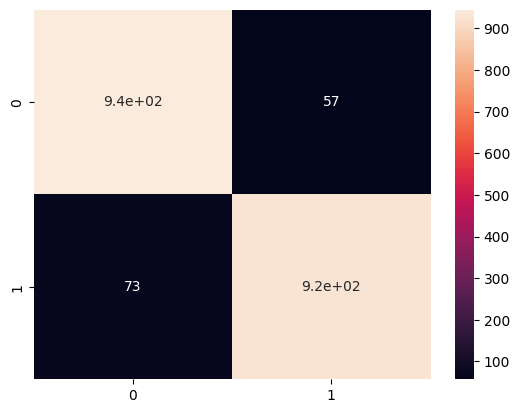

RandomForestClassifier
-- AUC: 0.95
-- Accuracy: 0.95


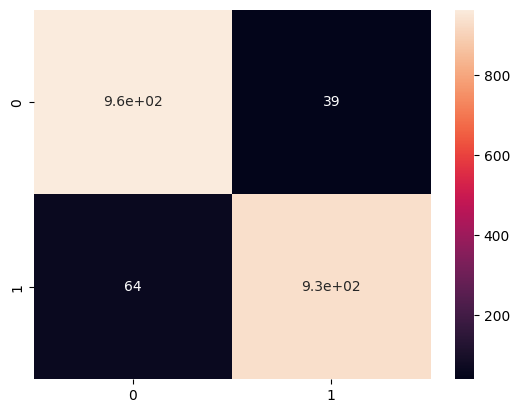

In [16]:

preds = [lr_y_pred, tr_y_pred, rf_y_pred]
models_name = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
for pred, model_name in zip(preds, models_name):
    score(y_valid, pred, model_name)

Bu yerda eng yaxshi ko'rsatkichni `RandomForestClassifer` modeli ko'rsatmoqda. Bu shu modelni tanladik

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, rf_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# ROC

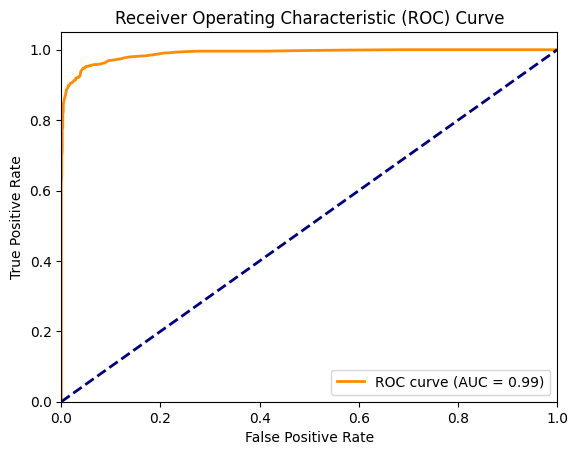

In [18]:
from sklearn.metrics import roc_curve, auc

# ROC chizig'ini chizamiz
y_pred_prob = rf_model.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve ni chizish
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# `test` datasetidagi ma'lumotlarni modilimiz asosida klassifikatsiya qilamiz

In [19]:
# Yuqoridagi kabi RandomForest algoritmidan foydalanamiz
test['Gender'] = labelencoder.fit_transform(test['Gender'].values)
test['Customer Type'] = labelencoder.fit_transform(test['Customer Type'].values)
test['Type of Travel'] = labelencoder.fit_transform(test['Type of Travel'].values)
test['Class'] = labelencoder.fit_transform(test['Class'].values)

In [20]:
test.set_index(test.columns[0], inplace=True)
test = test.fillna(0)

# Datasetni saqlaymiz

In [21]:
test_y = rf_model.predict(test)
sample['satisfaction'] = test_y
sample.head()

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [22]:
sample.to_csv('aviakom_new.csv', index=False)